In [1]:
from astroquery.ipac.irsa import Irsa
from astropy.coordinates import SkyCoord
import astropy.units as u

import matplotlib.pyplot as plt
import numpy as np

In [2]:
table = Irsa.query_region(coordinates="PTF11kx",catalog='ptf_lightcurves')

In [3]:
time = table["obsmjd"].data.data      # Observation time in MJD
mag = table["mag_autocorr"].data.data  # Magnitudes
zpmag = table["absphotzp"].data.data
magerr = table["magerr_auto"].data.data  # Magnitude errors
filters = table["fid"].data.data       # Filter ID
object_id = table["oid"].data.data     # Object ID (if needed)

flux = np.power(10, -0.4 * (mag - 23.9))
fluxerr = 0.4 * np.log(10) * magerr * flux

unique_filters = np.unique(filters)

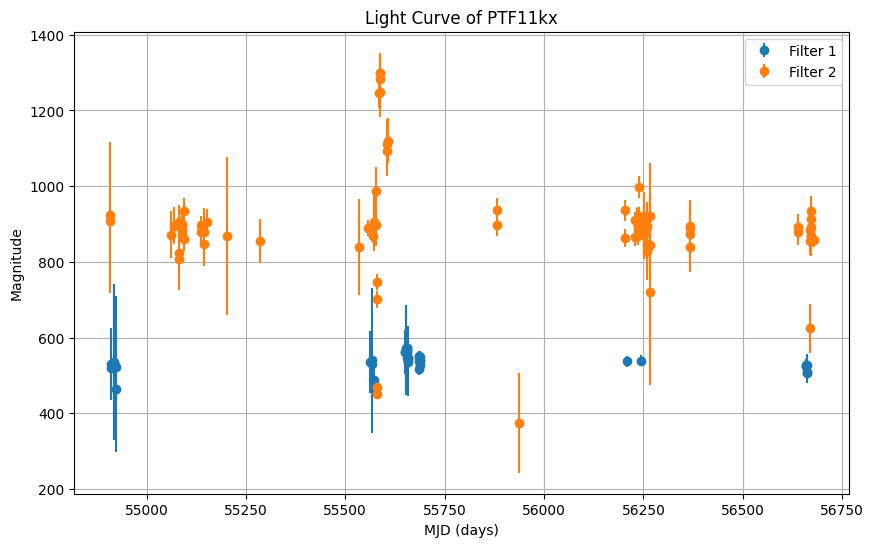

In [6]:
# Plotting the light curve
plt.figure(figsize=(10, 6))

for fid in unique_filters:
    # Select data for this filter
    mask = filters == fid
    plt.errorbar(time[mask], flux[mask], yerr=fluxerr[mask], fmt='o', label=f"Filter {fid}")

# Invert the y-axis because magnitudes are plotted with bright objects lower
# plt.gca().invert_yaxis()

# Labels and title
plt.xlabel("MJD (days)")
plt.ylabel("Magnitude")
plt.title("Light Curve of PTF11kx")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
np.unique(object_id)

array([  46221040000757,   46222040001067, 1002241090002090,
       1002242090004951, 1002242095002556, 1002242095002841])

In [69]:
table["absphotzp"]

27.711
27.817
27.660
27.640
27.812
27.834
27.768
27.813
27.681
27.809
27.598
